In [ ]:
#import python libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
from pandas_datareader import DataReader
     

!pip install --upgrade pandas-datareader

!pip install --upgrade pandas
     

In [2]:
#get the stock data
from datetime import datetime
from pandas_datareader import data
end = datetime(2018,3,3)
start = datetime(2010,3,3)
GOOG = data.DataReader('GOOG','yahoo',start,end)

     

In [3]:
GOOG.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-02-26,57.198002,56.334751,56.389999,57.187500,31182000.0,57.187500
2018-02-27,57.202000,55.900002,57.062000,55.914501,35482000.0,55.914501
2018-02-28,56.376499,55.161999,56.151501,55.236500,37652000.0,55.236500
2018-03-01,55.506001,53.350052,55.393501,53.476002,50318000.0,53.476002
2018-03-02,54.099949,52.405750,52.653999,53.945999,45432000.0,53.945999


In [4]:
GOOG.describe()
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2015 entries, 2010-03-03 to 2018-03-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2015 non-null   float64
 1   Low        2015 non-null   float64
 2   Open       2015 non-null   float64
 3   Close      2015 non-null   float64
 4   Volume     2015 non-null   float64
 5   Adj Close  2015 non-null   float64
dtypes: float64(6)
memory usage: 110.2 KB


In [5]:
n,p=GOOG.shape
print(n,p)

GOOG.isnull().sum()*100/n

2015 6


High         0.0
Low          0.0
Open         0.0
Close        0.0
Volume       0.0
Adj Close    0.0
dtype: float64

In [6]:
GOOG.corr()

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.999767,0.999860,0.999807,-0.586004,0.999807
Low,0.999767,1.000000,0.999788,0.999856,-0.591882,0.999856
Open,0.999860,0.999788,1.000000,0.999634,-0.587939,0.999634
Close,0.999807,0.999856,0.999634,1.000000,-0.589569,1.000000
Volume,-0.586004,-0.591882,-0.587939,-0.589569,1.000000,-0.589569
Adj Close,0.999807,0.999856,0.999634,1.000000,-0.589569,1.000000


Data Visualisation:

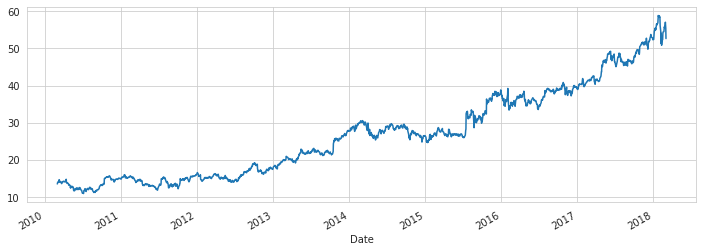

In [7]:
plt.figure(figsize=(12,4))
GOOG['Open'].plot()

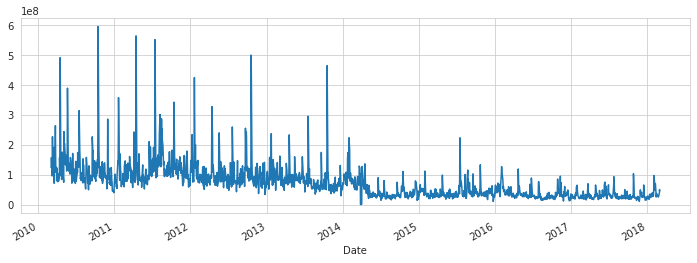

In [8]:
plt.figure(figsize=(12,4))
GOOG['Volume'].plot()

(1608,)
(403,)
52.65399932861328


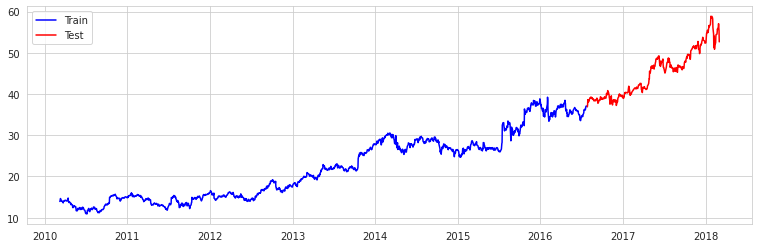

In [9]:
k = int(n*0.8) 
train = GOOG['Open'][4:k] 
test = GOOG['Open'][k:] 
print(train.shape)
print(test.shape)
print(test[-1])
plt.figure(figsize=(13,4))
plt.plot(train, 'blue', test, 'red')
plt.legend(["Train","Test"])
plt.show()



Preprocessing:

In [10]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = scalar.fit_transform(train.to_numpy().reshape(-1, 1))
test_set_scaled = scalar.transform(test.to_numpy().reshape(-1,1))

In [11]:
time_steps = 30 
predict = 30

X_train = []
y_train = []
for i in range(time_steps, k-predict-3):
    X_train.append(training_set_scaled[i-time_steps:i, 0])
    y_train.append(np.array(training_set_scaled[i:i+predict, 0]))
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1], 1))
print(X_train.shape)
print(y_train.shape)


(1549, 30, 1)
(1549, 30, 1)


Model Creation:

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [15]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1]))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 50, batch_size = 150) 

Epoch 1/50
11/11 [==============================] - 7s 104ms/step - loss: 0.1794
Epoch 2/50
11/11 [==============================] - 1s 102ms/step - loss: 0.0691
Epoch 3/50
11/11 [==============================] - 1s 100ms/step - loss: 0.0291
Epoch 4/50
11/11 [==============================] - 1s 100ms/step - loss: 0.0218
Epoch 5/50
11/11 [==============================] - 1s 102ms/step - loss: 0.0181
Epoch 6/50
11/11 [==============================] - 1s 100ms/step - loss: 0.0163
Epoch 7/50
11/11 [==============================] - 1s 99ms/step - loss: 0.0143
Epoch 8/50
11/11 [==============================] - 1s 100ms/step - loss: 0.0138
Epoch 9/50
11/11 [==============================] - 1s 99ms/step - loss: 0.0129
Epoch 10/50
11/11 [==============================] - 1s 106ms/step - loss: 0.0121
Epoch 11/50
11/11 [==============================] - 1s 113ms/step - loss: 0.0122
Epoch 12/50
11/11 [==============================] - 1s 112ms/step - loss: 0.0117
Epoch 13/50
11/11 [========

In [16]:
inputs = np.concatenate((training_set_scaled[-time_steps:],test_set_scaled),axis=0) 

X_test = []
for i in range(time_steps, len(inputs)+1):
    X_test.append(inputs[i-time_steps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
print(test.values.shape)

predicted_stock_price = model.predict(X_test[:-30]) 
predicted_stock_price = scalar.inverse_transform(predicted_stock_price)
print(predicted_stock_price.shape)

(404, 30, 1)
(403,)
12/12 [==============================] - 1s 13ms/step
(374, 30)


Evaluation:

In [17]:
mat = []

for i in range(n-k-predict+1):
    mat.append(np.array(test[i:i+predict]))
    
mat = np.array(mat)


In [18]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def evaluate(actual, predicted):
	scores = list()
	for i in range(actual.shape[1]):
	 mse = mean_squared_error(actual[:, i], predicted[:, i])
	 rmse = sqrt(mse)
	 scores.append(rmse)
	s = 0
	for row in range(actual.shape[0]):
		for col in range(actual.shape[1]):
			s += (actual[row, col] - predicted[row, col])**2
	score = sqrt(s / (actual.shape[0] * actual.shape[1]))
	return score, scores

score, scores = evaluate(mat,predicted_stock_price)
print("RMSE general: ", score,  " ", np.array(scores).reshape(-1,1))


RMSE general:  4.416656087772106   [[3.08079802]
 [2.97498659]
 [3.33537371]
 [3.74139795]
 [3.3532175 ]
 [3.60181974]
 [3.8591477 ]
 [3.77831823]
 [3.62992366]
 [4.19949107]
 [4.01869813]
 [3.99684357]
 [4.81503987]
 [4.48010902]
 [3.95902096]
 [4.37157484]
 [4.92066922]
 [4.83250756]
 [4.83735634]
 [5.03879433]
 [4.881488  ]
 [4.80471916]
 [4.88275862]
 [5.30132531]
 [5.31987099]
 [4.81883333]
 [4.92957585]
 [4.75042914]
 [5.06633545]
 [5.3014433 ]]


(374, 30)
(374, 30)


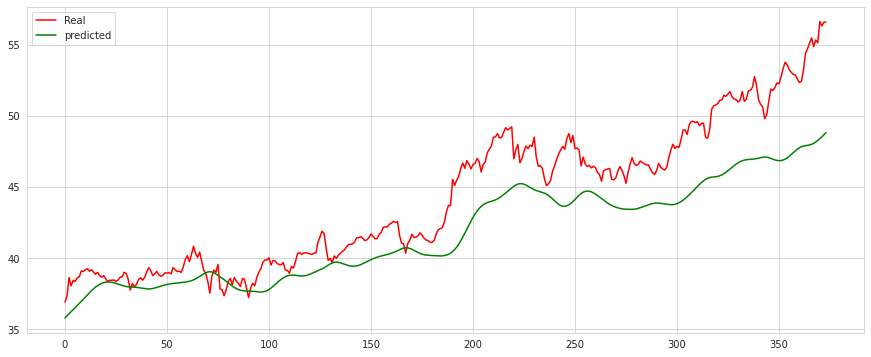

In [20]:
plt.figure(figsize=(15, 6))
plt.plot(mat[:,0], color = 'red', label = 'Real') 
plt.plot(predicted_stock_price[:,0], color = 'green', label = 'predicted')
plt.legend()

print(predicted_stock_price.shape)
print(mat.shape)


(374, 30)
(374, 30)


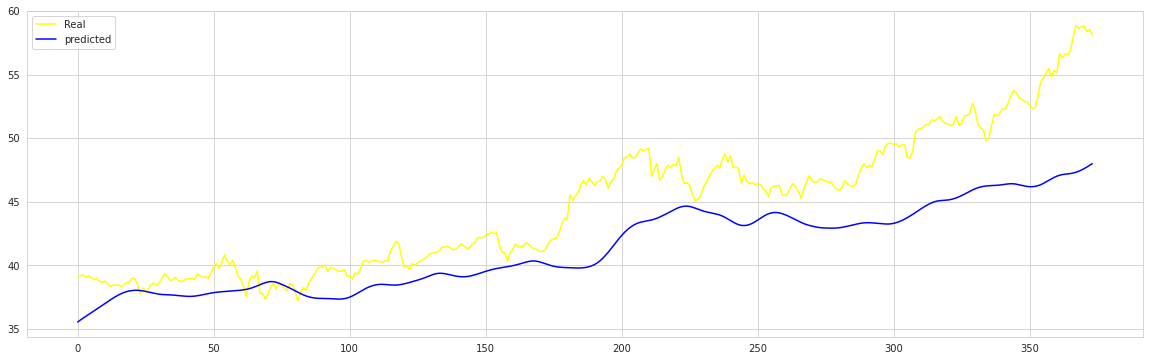

In [24]:
plt.figure(figsize=(20, 6))
plt.plot(mat[:,9], color = 'yellow', label = 'Real') 
plt.plot(predicted_stock_price[:,9], color = 'blue', label = 'predicted')
plt.legend()

print(predicted_stock_price.shape)
print(mat.shape)

(374, 30)
(374, 30)


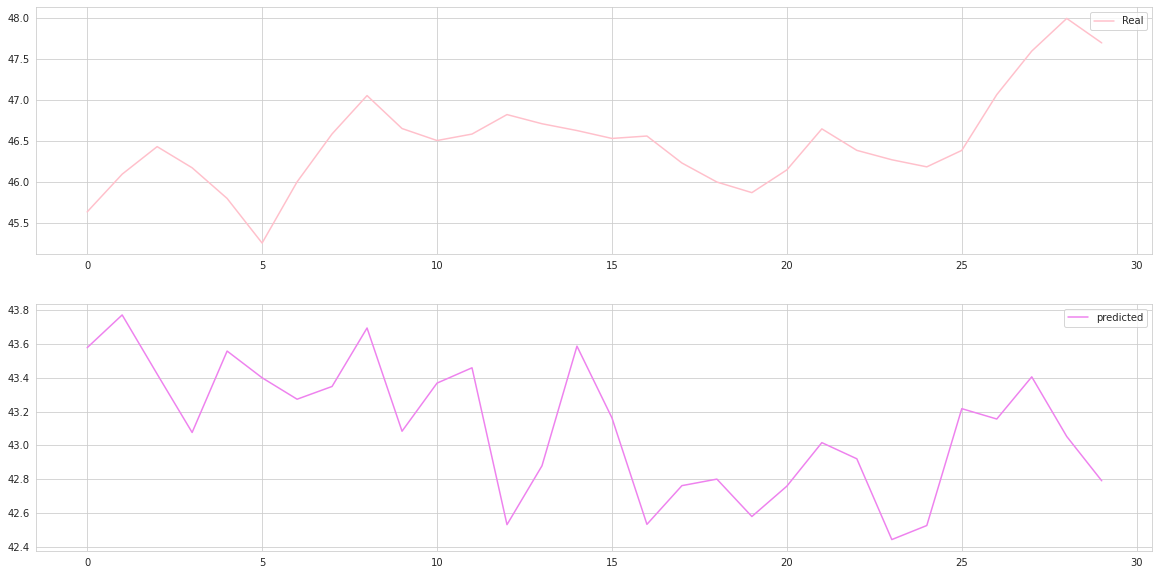

<Figure size 1440x1440 with 0 Axes>

In [23]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(20, 10))

plt.figure(figsize=(20, 20))
ax1.plot(mat[270,:], color = 'pink', label = 'Real')
ax2.plot(predicted_stock_price[270,:], color = 'violet', label = 'predicted')
ax1.legend()
ax2.legend()


print(predicted_stock_price.shape)
print(mat.shape)
